In [1]:
#imagem
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
#pré-processamento:
from skimage.filters import rank
from skimage import morphology
from skimage.filters import rank
from scipy import ndimage as ndi

#wavelets
import pywt
import pywt.data

#hough transform
from skimage.transform import hough_ellipse
import matplotlib.patches as mpatches

### Transformada de Hough
A HT é uma técnica que pode ser utilizada na extração de features de imagens, onde é realizada uma busca por formas conhecidas, e aplicando um processo de votação, onde objetos candidados são obtidos analisando um acumulador e identificando o máximo local. Originalmente a HT era utilizada na identificação de linhas em imagens, mas foi extendida para outros shapes, como círculos e elipses.<br><br>
Normalmente um detector de bordas é utilizado no pré-processamento da imagem para obter pontos ou pixels que se localizam na curva desejada. Devido a imperfeições na imagem e no detector de borda, alguns pontos podem ser perdidos. A proposta da HT é fornecer uma técnica para agrupar estes pontos em objetos candidatos, que serão escolhidos com base em um processo de votação.

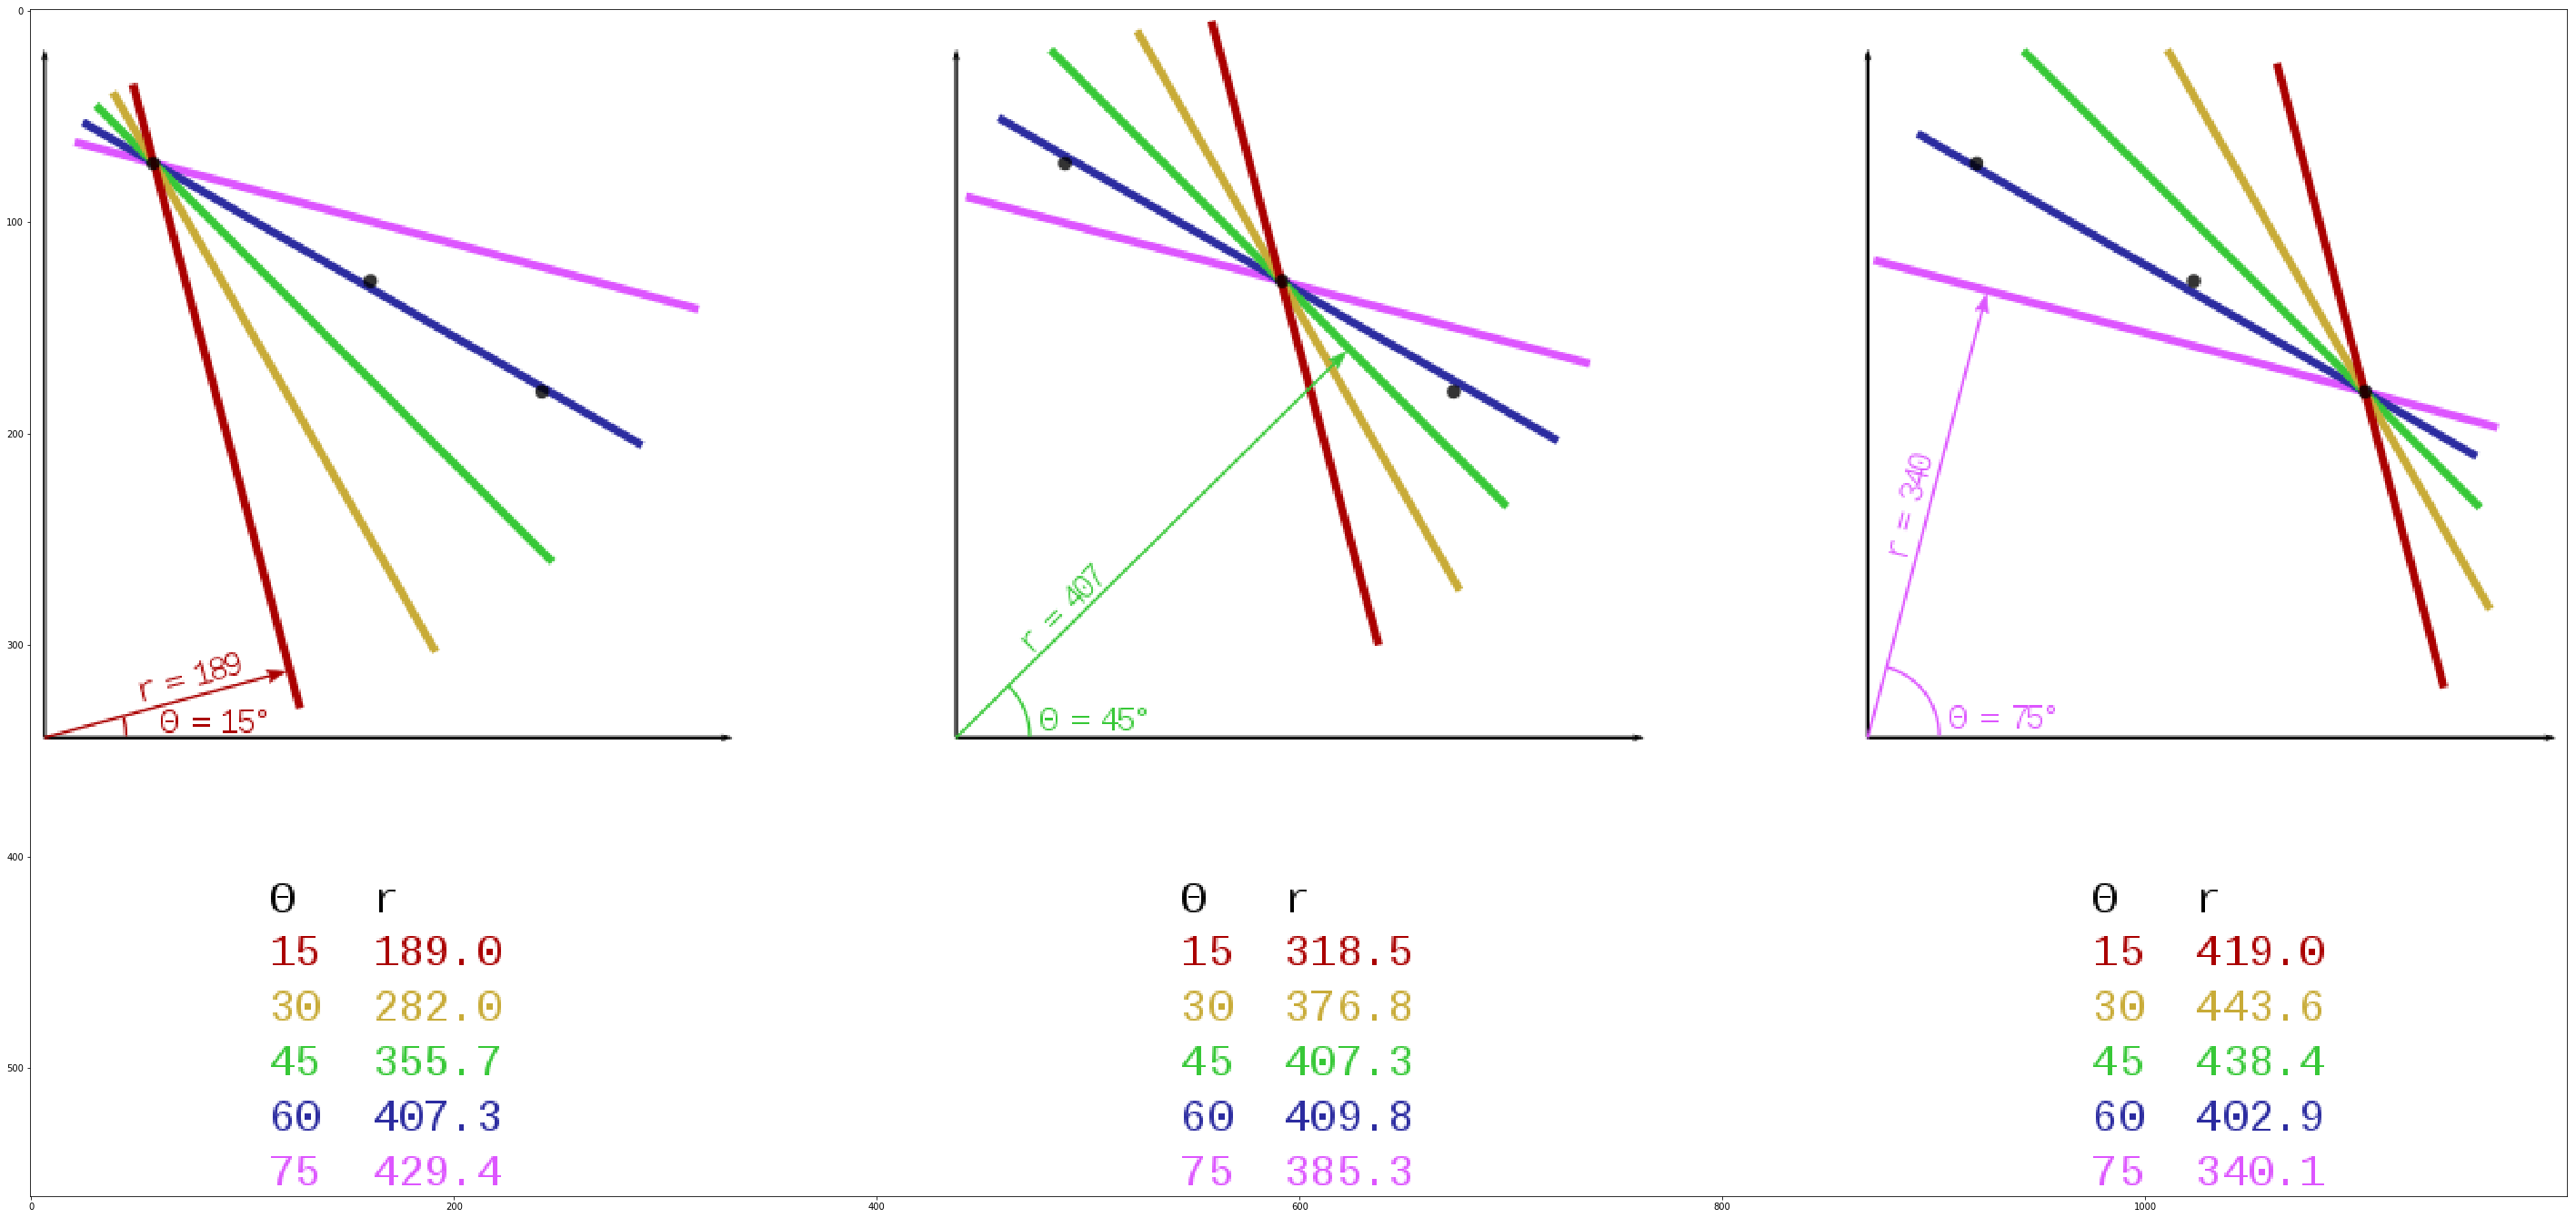

In [2]:
ht = mpimg.imread('HT_1.png')
plt.figure(figsize=(50,50))
plt.imshow(ht)

Para cada ponto, um número de linhas é plotado com angulos diferentes, e para cada linha, uma reta de suporte é criada ortogonal a esta e que intersecta a origem. O comprimento e o angulo da reta suporte é guardada no acumulador para cada uma das linhas plotadas.<br><br>
No exemplo, a linha suporte de angulo $60^o$ exibe tamanho similar em todos os casos, considerando assim que as linhas azuis são similares, e podemos assumir que os pontos pertecem a uma linha com as características da linha azul.<br><br>
No caso de círculos, o acumulador deve ter 3 componentes, que identificam o centro do círculo e o raio.<br><br>
A utilização do gradiente para detectar formas se deve ao fato de que o gradiente local de uma imagem é ortogonal à uma borda.<br><br>
#### Processo de detecção de círculos:
$\cdot$Primeiro, o acumulador é criado com uma célula para cada pixel, cujo valor inicial é zero.<br>
$\cdot$ Para cada ponto de borda $(i,j)$, incrementa todas as células <b>$a$</b> que de acordo com a equação $ (i-a)^2 +(j-b)^2 = r^2$ poderiam ser o centro de um círculo.<br>
$\cdot$Para cada valor de <b>a</b> encontrado, identifique os possíveis valores de <b>b</b> que satisfazem a equação. <br>
$\cdot$Procure pelo máximo local no acumulador. Estas células representam os círculos detectados na imagem.


Aplicação: identificar um círculo que demarque a região do disco óptico em uma imagem de retina.

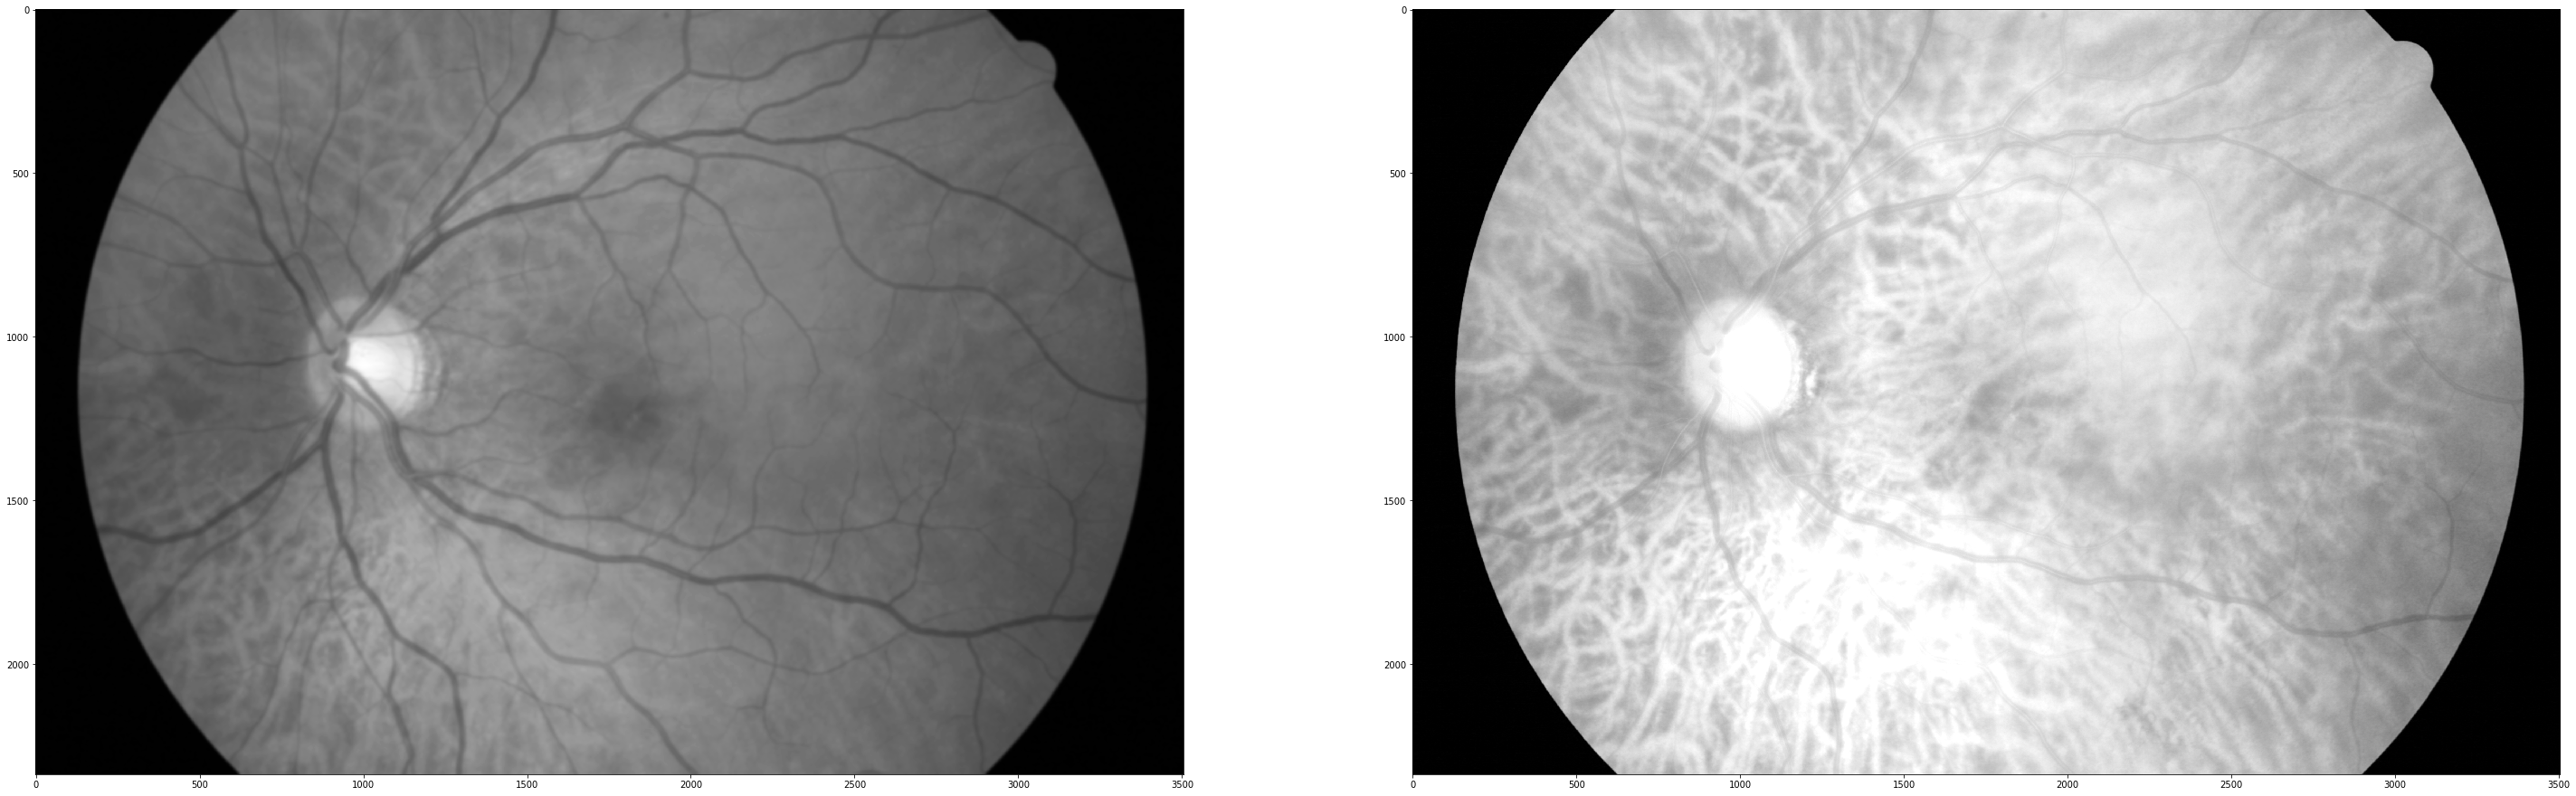

In [3]:
image_x= mpimg.imread('02_h.jpg')
image_o = cv2.imread('02_h.jpg')
img_gray = cv2.cvtColor(image_o, cv2.COLOR_BGR2GRAY)
img_gray = cv2.GaussianBlur(img_gray, (31,31), cv2.BORDER_DEFAULT)
plt.figure(figsize=(50,50))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(image_x[:, :,0], cmap='gray')
img_o = image_x[:, :,0]

#### Aplicação da wavelet<br>
Em processamento de imagens, as wavelets são utilizadas para compressão, atenuação de ruído e segmentação de imagens.

In [4]:
print(pywt.wavelist(kind='discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


In [5]:
[LL3,(LH3, HL3, HH3), (LH2, HL2, HH2),(LH1, HL1, HH1)] = pywt.wavedec2(img_o, 'haar', level=3)
# [(LL3a,(LH3a, HL3a, HH3a)), (LL2a, (LH2a, HL2a, HH2a)), (LL1a, (LH1a, HL1a, HH1a))] = pywt.swt2(img_o, 'haar', level=3)
#[LL3b,(LH3b, HL3b, HH3b), (LH2b, HL2b, HH2b),(LH1b, HL1b, HH1b)] = pywt.wavedec2(img_o, 'coif4', level=3)


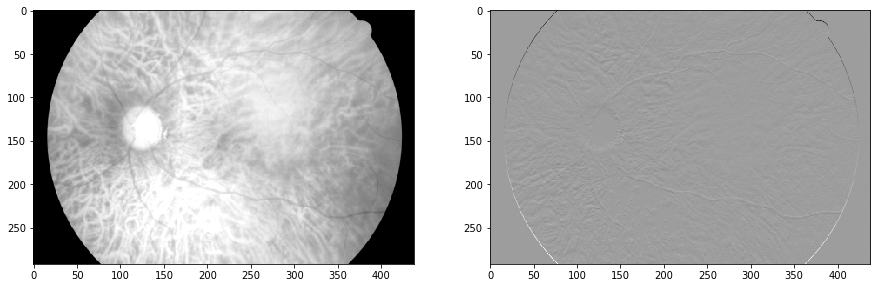

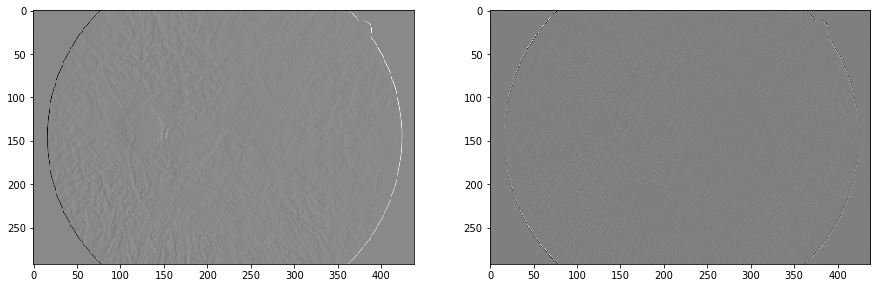

In [6]:
# haar
img = LL3
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
# image = img_o
plt.subplot(1,2,2)
plt.imshow(LH3, cmap='gray')
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(HL3, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(HH3, cmap='gray')
# a trois
# img = LL3a
# plt.figure(figsize=(15,15))
# plt.subplot(1,2,1)
# plt.imshow(img, cmap='gray')
# # image = img_o
# plt.subplot(1,2,2)
# plt.imshow(LH3a, cmap='gray')
# plt.figure(figsize=(15,15))
# plt.subplot(1,2,1)
# plt.imshow(HL3a, cmap='gray')
# plt.subplot(1,2,2)
# plt.imshow(HH3a, cmap='gray')
# db1
# img = LL3b
# plt.figure(figsize=(15,15))
# plt.subplot(1,2,1)
# plt.imshow(img, cmap='gray')
# # image = img_o
# plt.subplot(1,2,2)
# plt.imshow(LH3b, cmap='gray')
# plt.figure(figsize=(15,15))
# plt.subplot(1,2,1)
# plt.imshow(HL3b, cmap='gray')
# plt.subplot(1,2,2)
# plt.imshow(HH3b, cmap='gray')

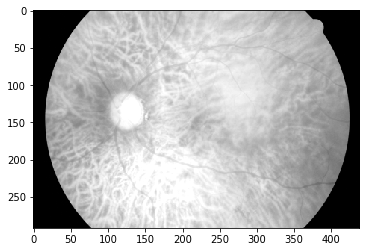

In [7]:
img_norm = img /np.max(img) #normalização dos valores entre 0 e 1.
plt.imshow(img_norm, cmap='gray')

Filtragem: filtro de média e abertura morfológica. A abertura consiste da erosão seguida da dilatação, e serve para eliminar pequenos componentes e suavizar contornos.

In [8]:
denoised= rank.median(img_norm, morphology.disk(5))
denoised_op = morphology.opening(denoised, morphology.disk(5))


C:\Users\andre\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5,0,'filtro de média e abertura')

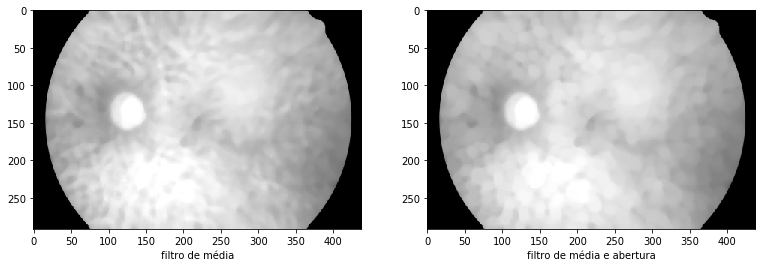

In [9]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(denoised, cmap='gray')
plt.xlabel('filtro de média')
plt.subplot(1,3,2)
plt.imshow(denoised_op, cmap='gray')
plt.xlabel('filtro de média e abertura')

In [10]:
grad = rank.gradient(denoised,  morphology.disk(2)) #local gradient of an image (i.e. local maximum - local minimum)
grad2 = rank.gradient(denoised_op,  morphology.disk(2))

In [11]:
mk1 = grad <100
mk2 = grad <25
mk3 = grad <15
mk4 = grad <8
mk5 = grad2 <100
mk6 = grad2 <25
mk7 = grad2 <15
mk8 = grad2 <2

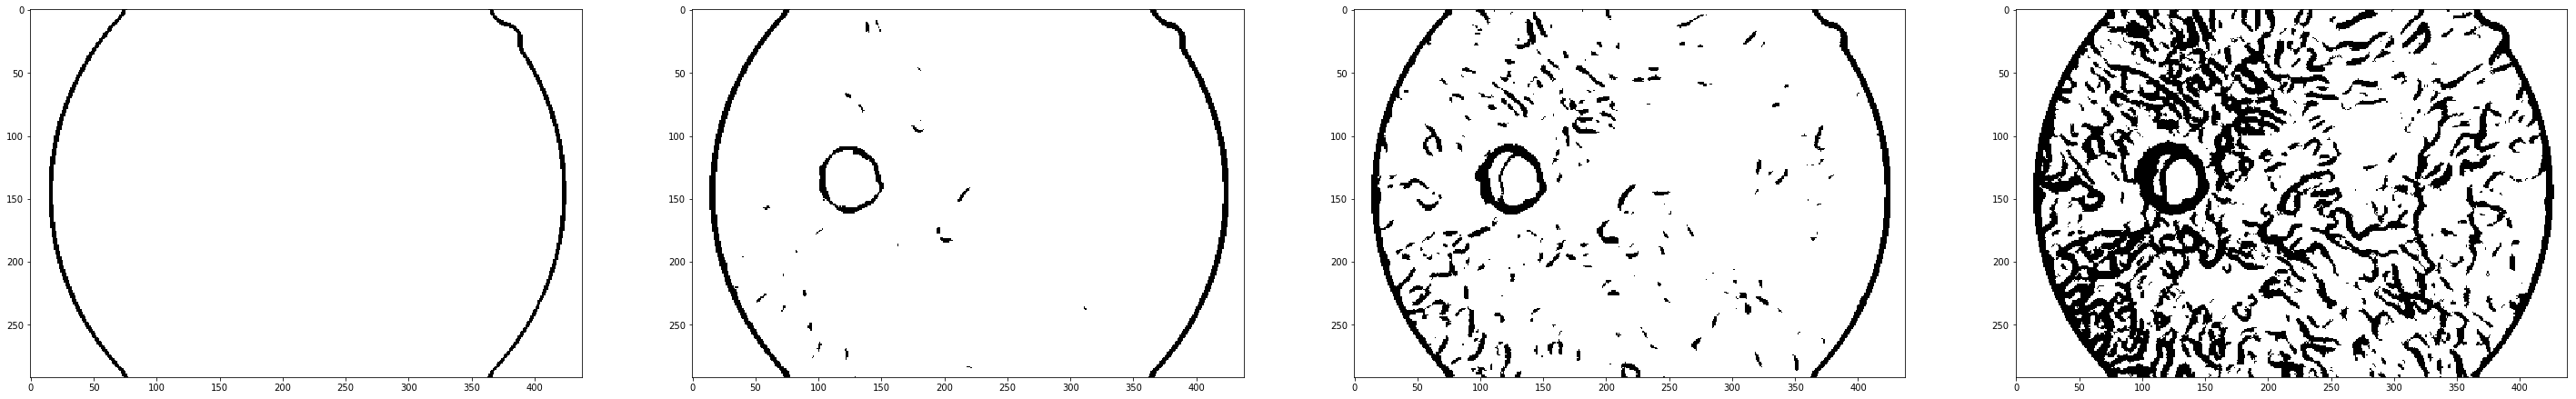

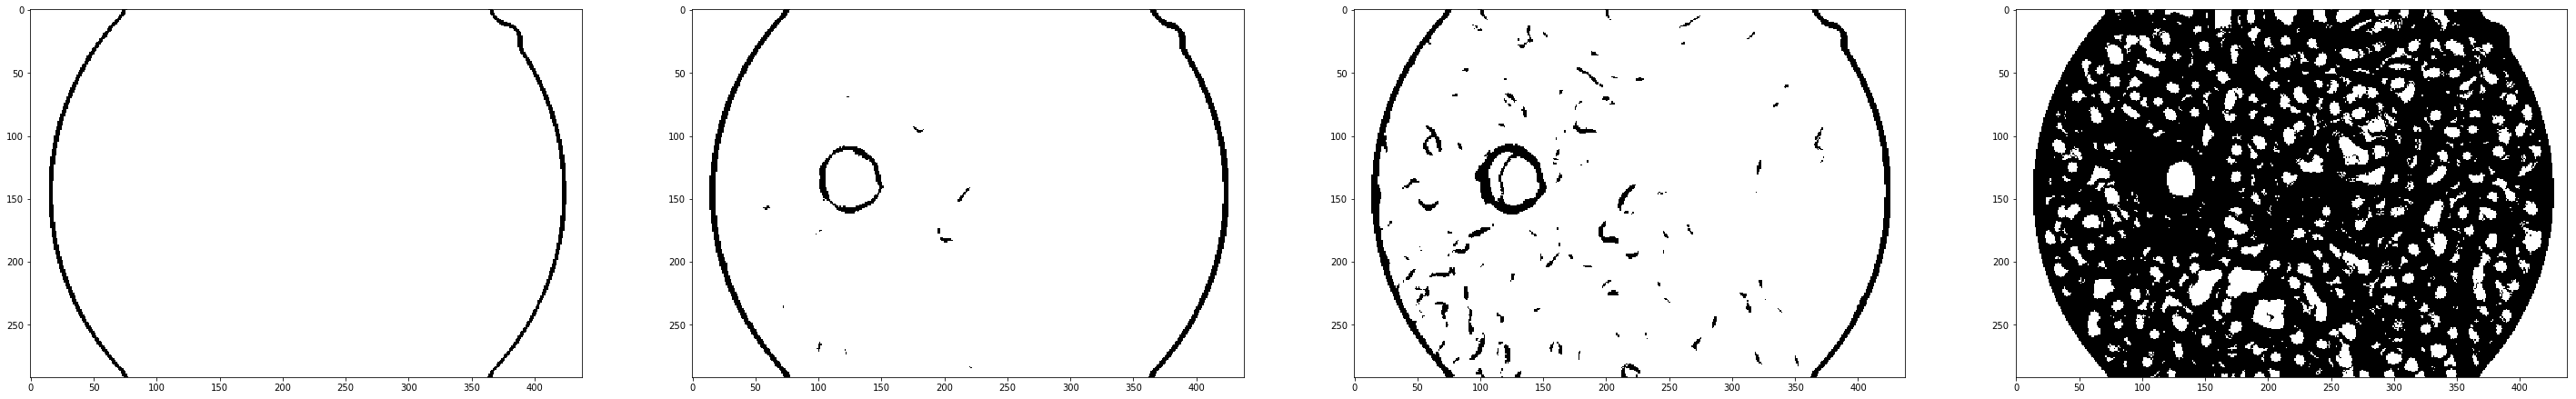

In [12]:
plt.figure(figsize=(50,50))
plt.subplot(1,4,1)
plt.imshow(mk1,cmap='gray')
plt.subplot(1,4,2)
plt.imshow(mk2,cmap='gray')
plt.subplot(1,4,3)
plt.imshow(mk3,cmap='gray')
plt.subplot(1,4,4)
plt.imshow(mk4,cmap='gray')
plt.figure(figsize=(50,50))
plt.subplot(1,4,1)
plt.imshow(mk5,cmap='gray')
plt.subplot(1,4,2)
plt.imshow(mk6,cmap='gray')
plt.subplot(1,4,3)
plt.imshow(mk7,cmap='gray')
plt.subplot(1,4,4)
plt.imshow(mk8,cmap='gray')

In [13]:
(labels2,nof2) = ndi.label(mk2)
(labels6,nof6) = ndi.label(mk6)

print('num. features fig 2:',nof2,'\n num. features fig 6:', nof6)

num. features fig 2: 4 
 num. features fig 6: 4


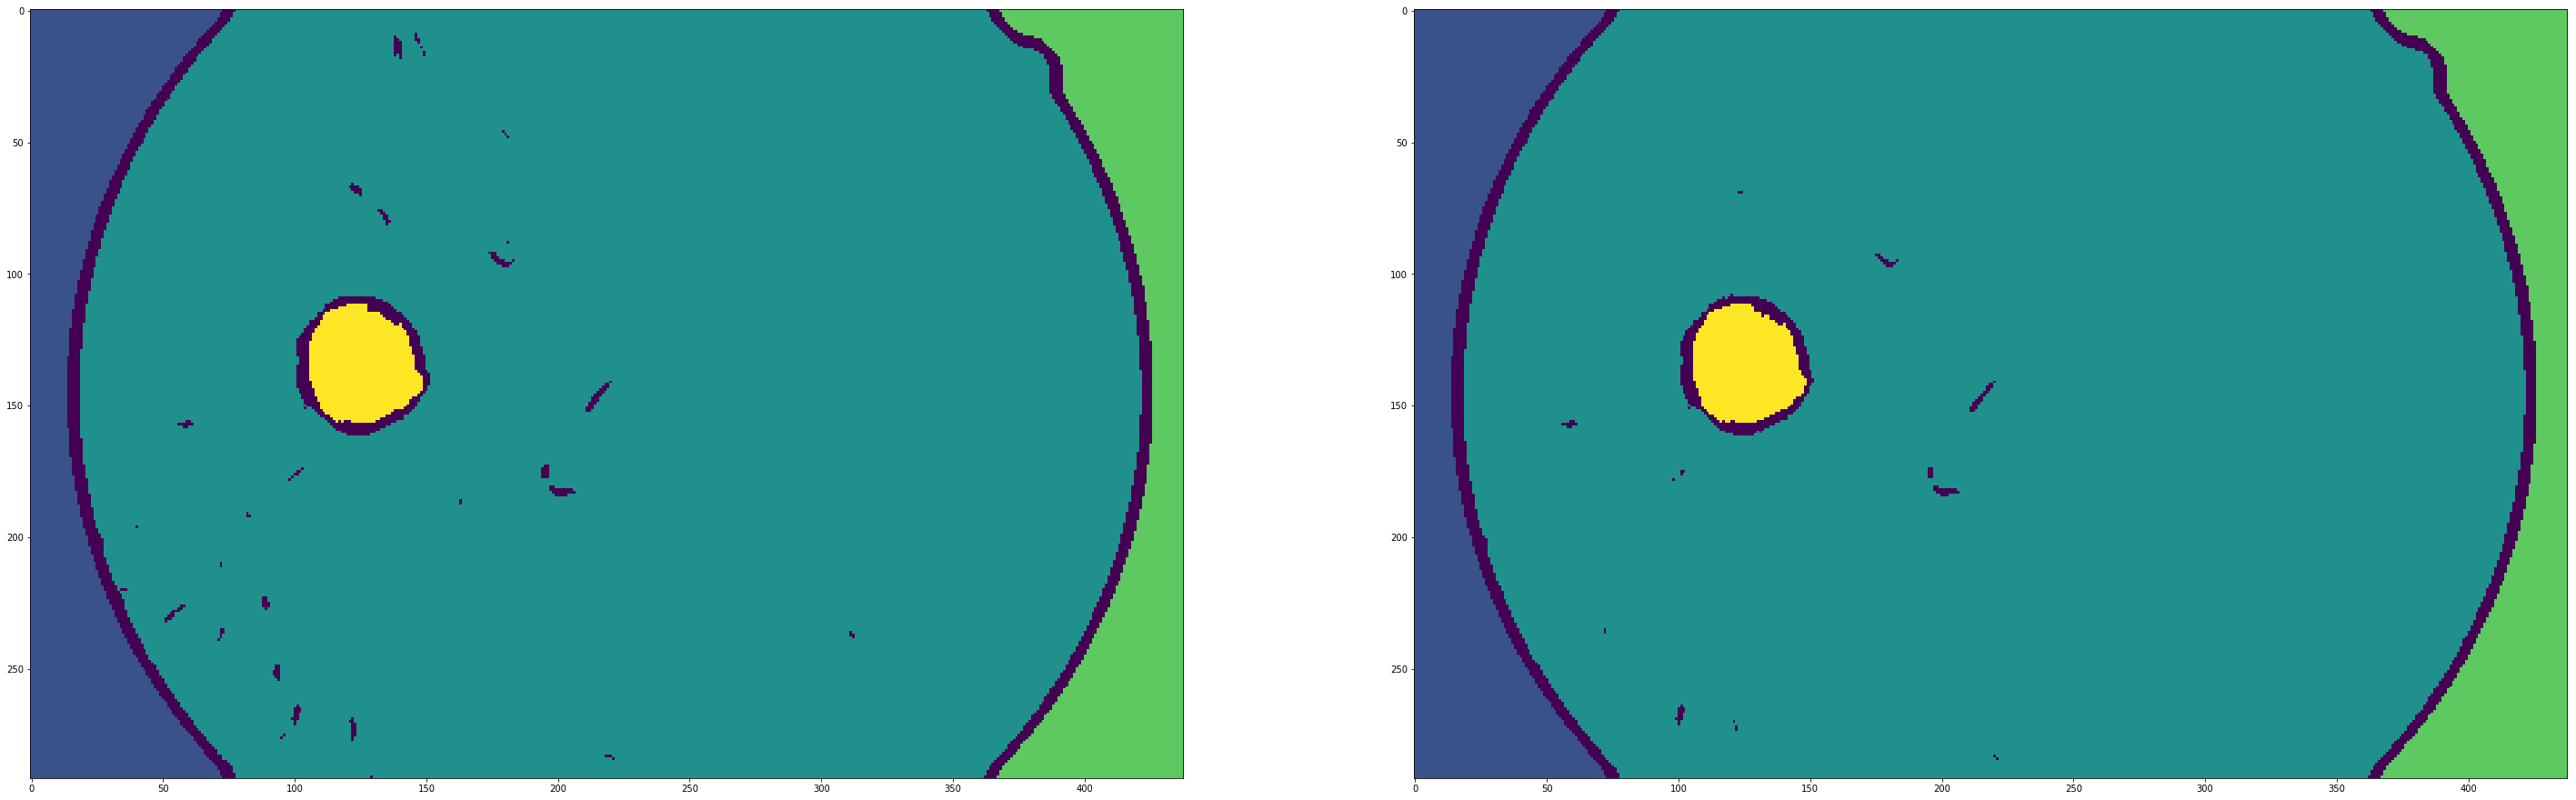

In [14]:
plt.figure(figsize=(50,50))
plt.subplot(1,2,1)
plt.imshow(labels2)
plt.subplot(1,2,2)
plt.imshow(labels6)

A imagem numero 6 foi a escolhida. A label numero 4 é a feature do disco optico.
A dilatação morfologica ajuda a preencher o objeto e a aumentar seu perímetro tornar o contorno mais suavizado.

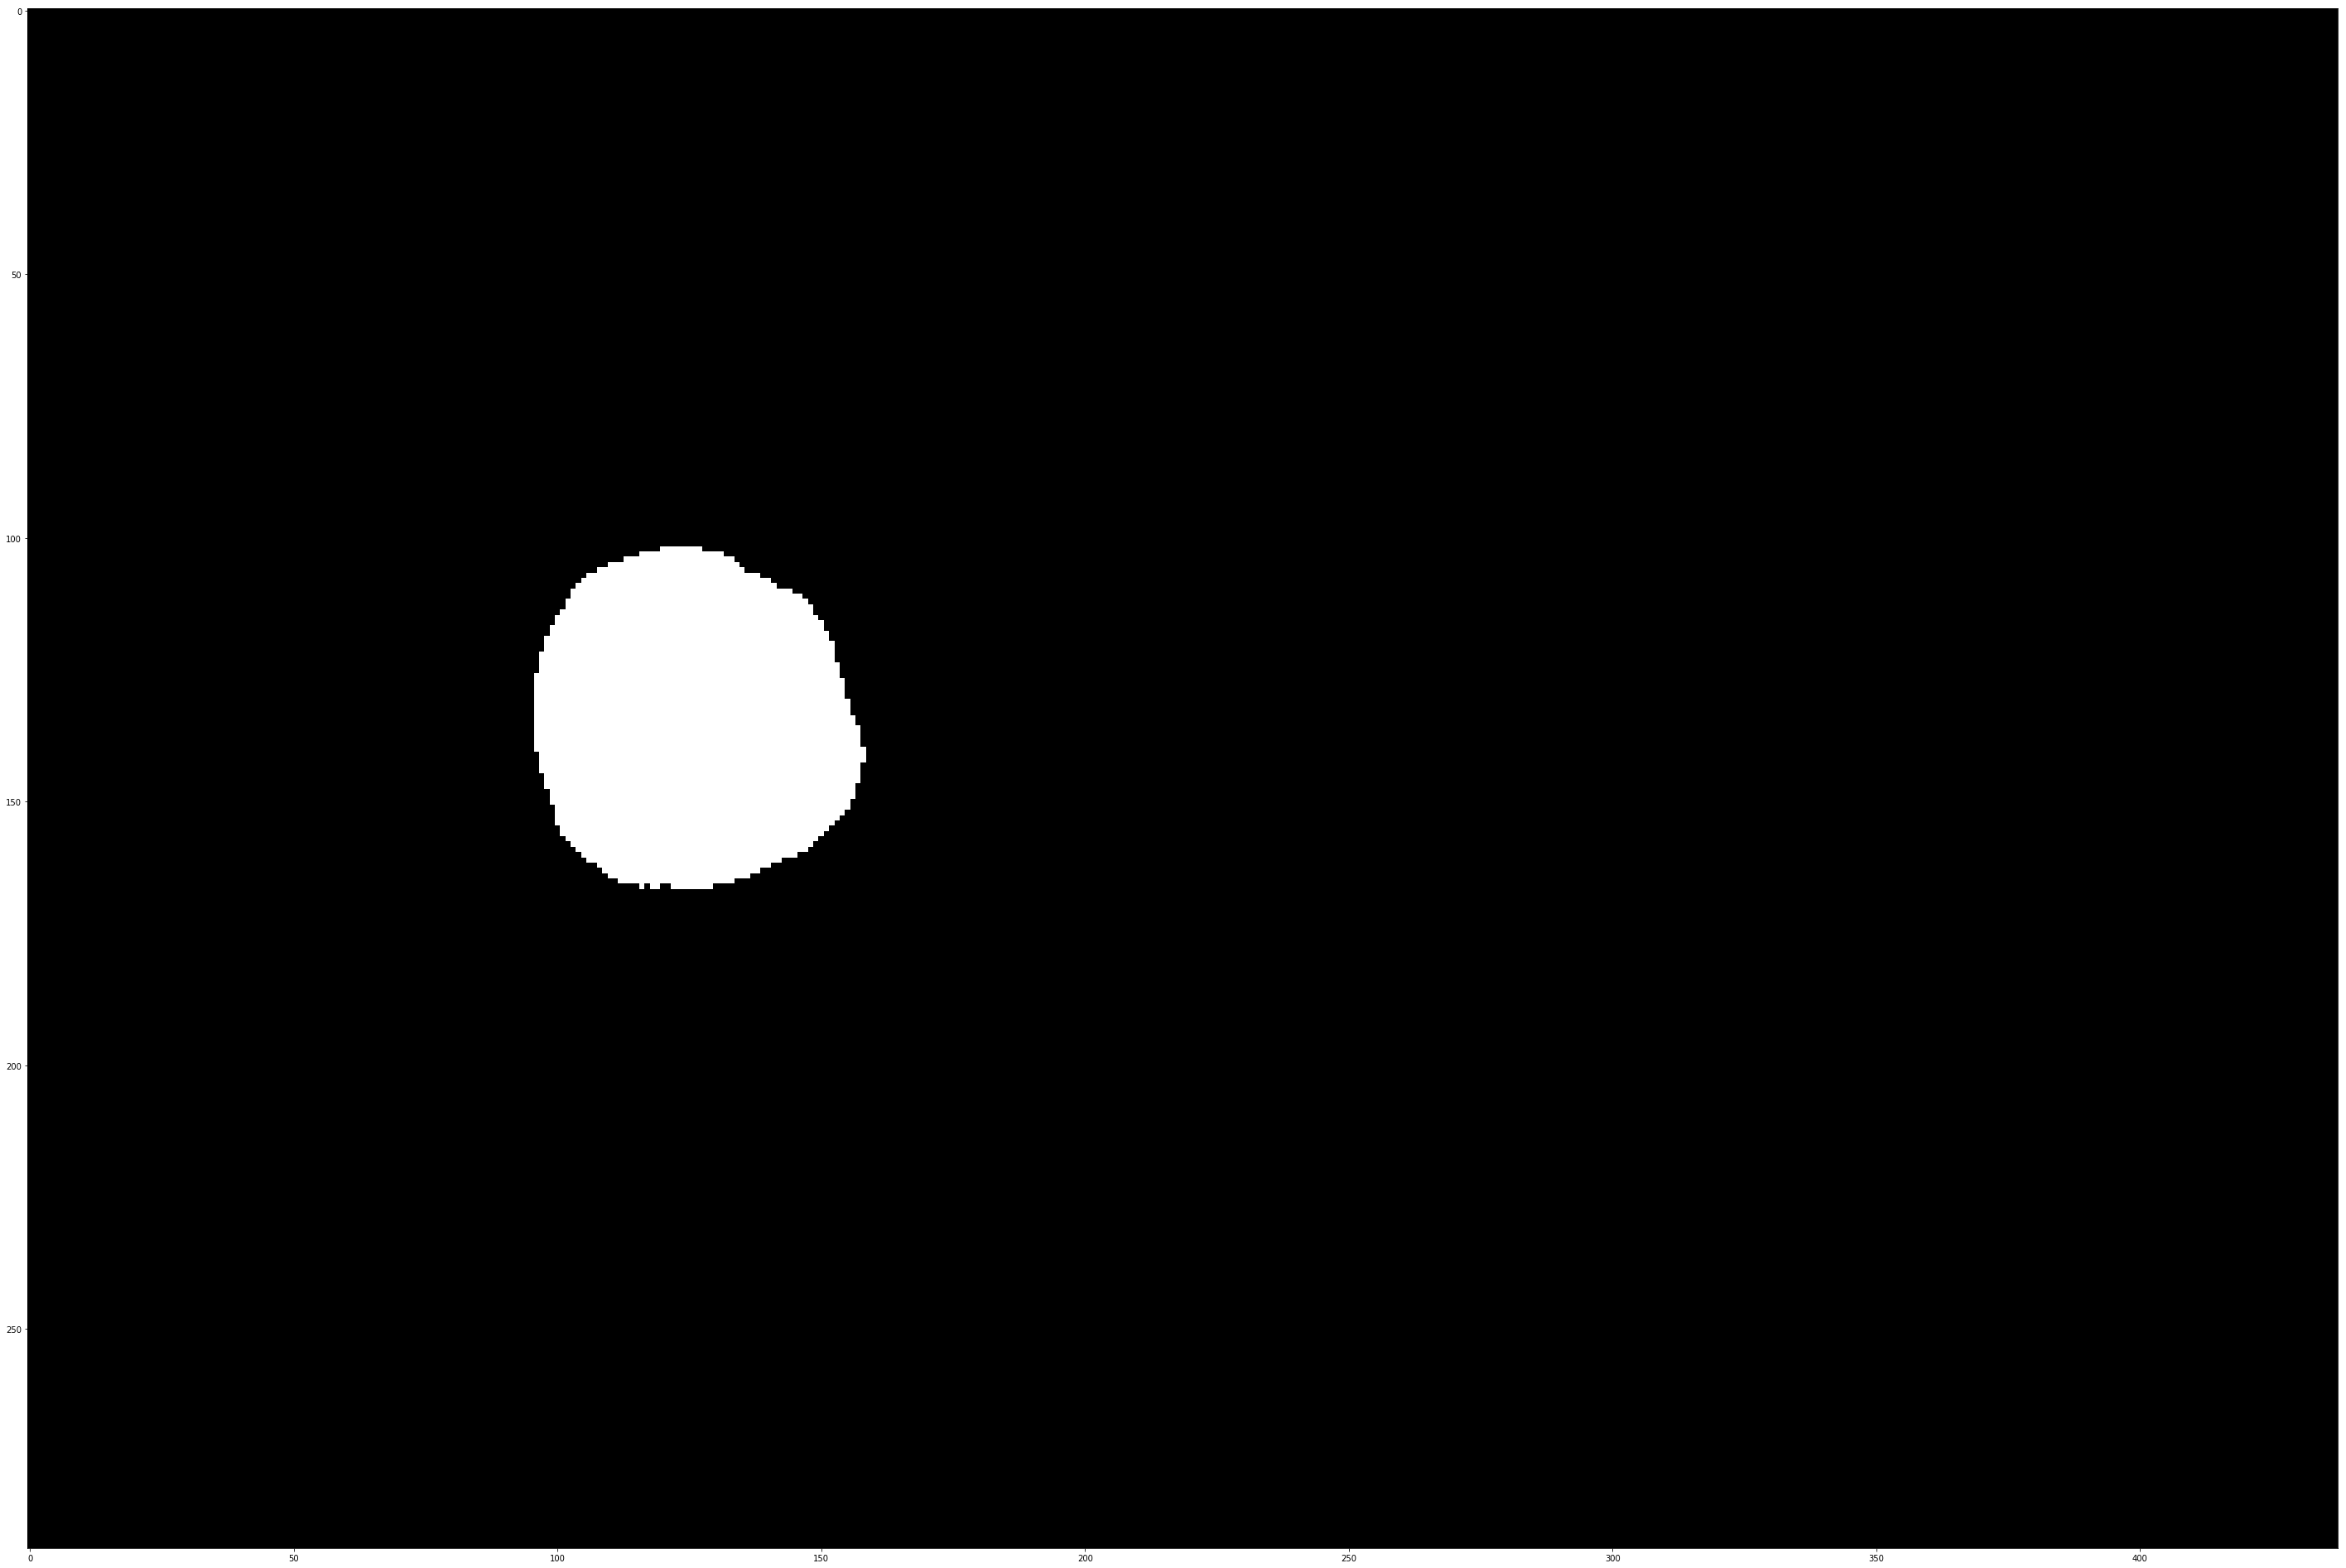

In [15]:
lb = labels6 ==4
lb_op = morphology.dilation(lb, morphology.disk(10))
plt.figure(figsize=(50,50))
plt.imshow(lb_op, cmap='gray')

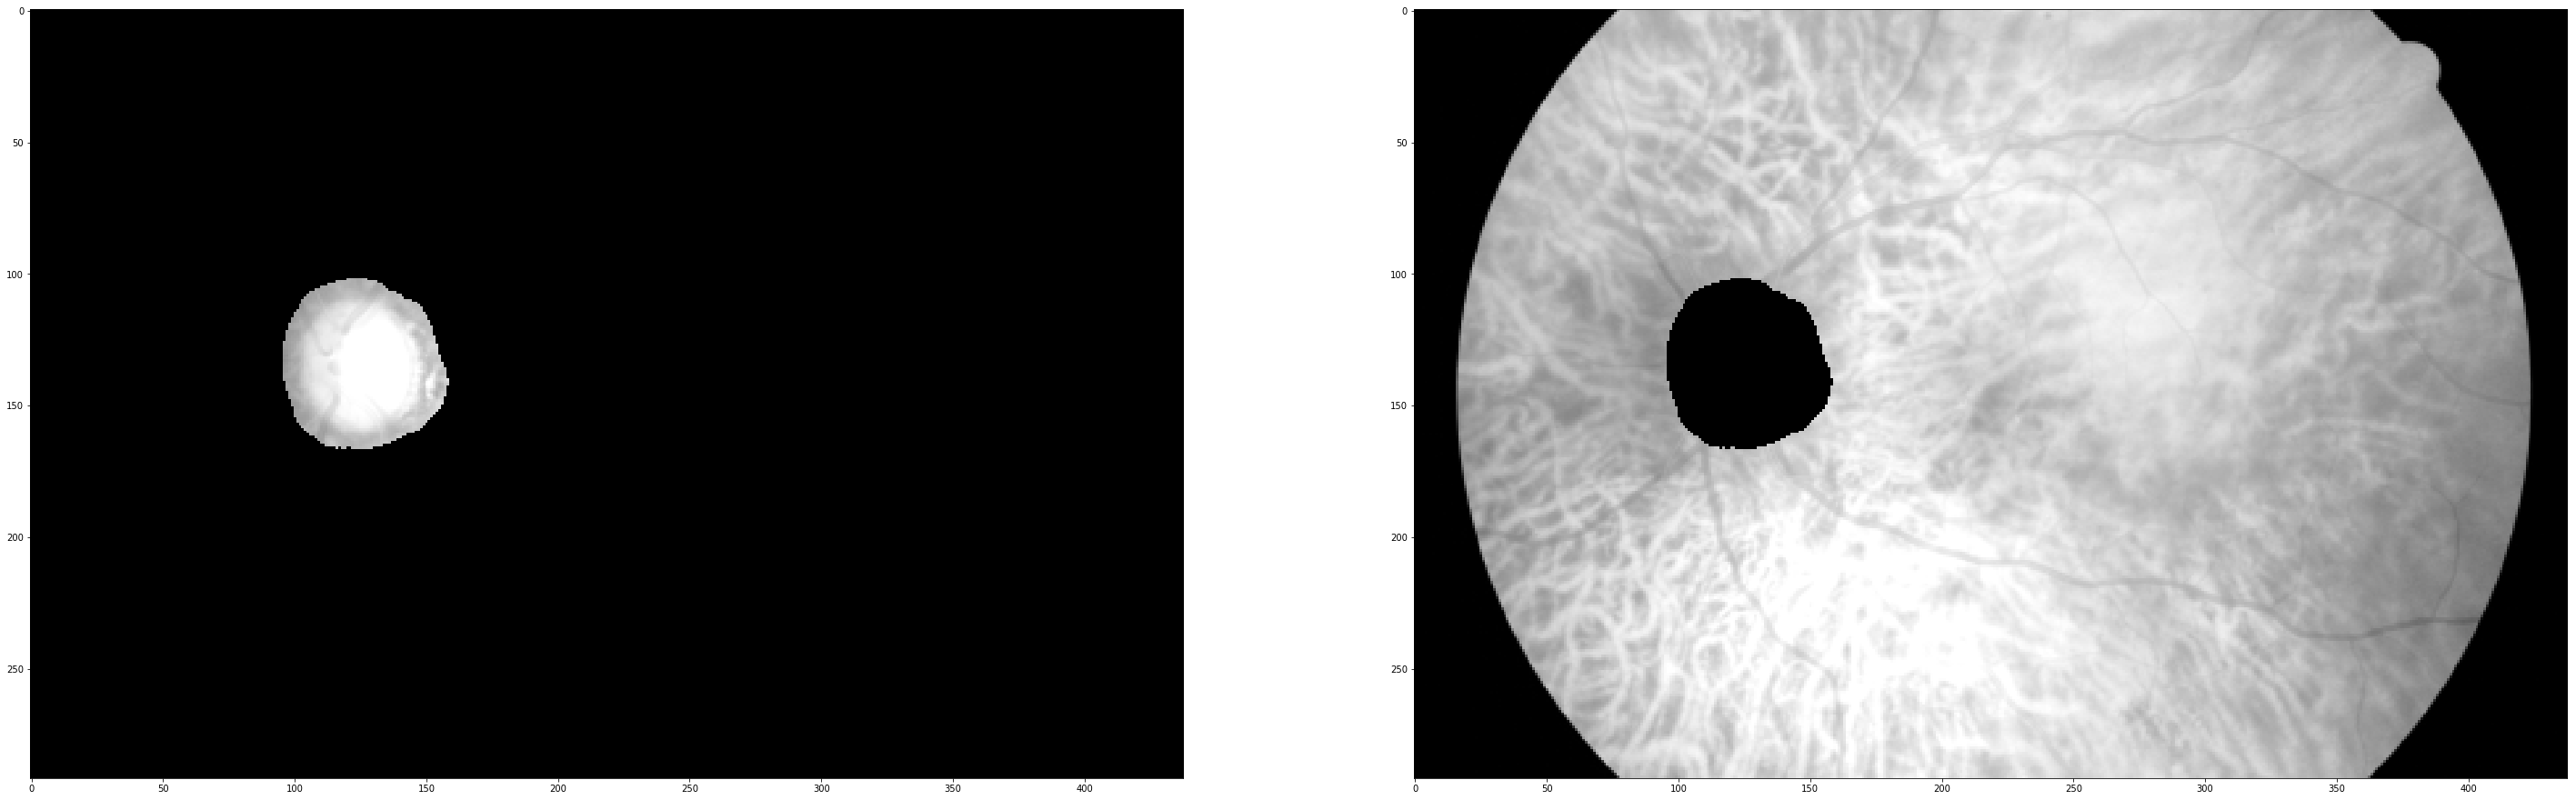

In [16]:
plt.figure(figsize=(50,50))
plt.subplot(1,2,1)
plt.imshow(img_norm*lb_op, cmap='gray')
plt.subplot(1,2,2)
cut =img_norm-img_norm*lb_op
plt.imshow(cut, cmap='gray')


Aplicação de Hough para criar o perímetro circular .


A função HoughCircles do OpenCV normalmente encontra os centros dos círculos bem, falhando na estimação dos raios. A função utiliza o método de Gradiente de Hough para detectar as bordas dos círculos

Parâmetros da função do OpenCV:<br>
$\cdot$ imagem: a imagem passada deve estar no tipo uint8.<br>
$\cdot$ método: HOUGH_GRADIENT<br>
$\cdot$ dp: razão inversa da resolução do acumulador. Se dp=2, a resolução do acumulador é metade da resolução da imagem.<br>
$\cdot$ minDist: distância mínima entre os centros dos círculos.<br>
$\cdot$ param1>: utilizado no método HOUGH_GRADIENT, é o limiar utilizado no detector de bordas (Canny).<br>
$\cdot$ param2: limiar do acumulador para considerar o centro dos círculos. Quanto menor, maior o número de falsos círculos encontrados.<br>
$\cdot$ minRadius: menor raio de círculo que será considerado<br>
$\cdot$ minRadius: maior raio de círculo que será considerado <br>

[[[123.  131.   28.8]]]
(292, 438)


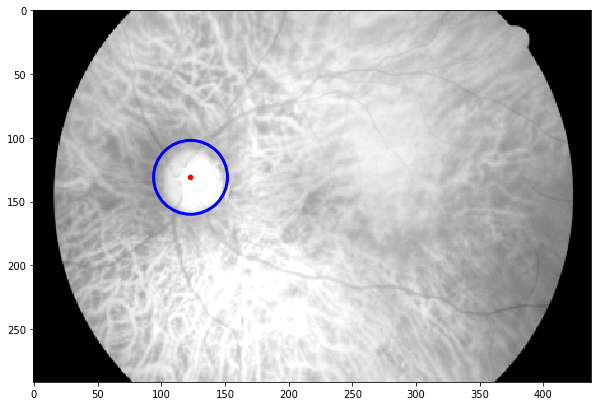

In [17]:
disc = cv2.HoughCircles(np.uint8(lb_op), cv2.HOUGH_GRADIENT, dp = 2, minDist= 200, param1=1, param2=10,minRadius=5, maxRadius=30)
print(disc)

disc = np.uint16(np.around(disc))
circ = mpatches.Circle((disc[0][0][0],disc[0][0][1]),disc[0][0][2], fill=False, edgecolor='blue', linewidth=3, linestyle='-')
cent = mpatches.Circle((disc[0][0][0],disc[0][0][1]),1, fill=False, edgecolor='red', linewidth=3, linestyle='-')

fig2, ax2 = plt.subplots(figsize=(10,10))

ax2.imshow(img_norm, cmap='gray')
ax2.add_patch(circ)
ax2.add_patch(cent)
print(lb_op.shape)
